MSc in Data Science

Deep Learning Project

Nikolaos Paraskakis / I.D.: 2321

Dimitrios Tselentis / I.D.: 2325

### Baseline Model with Audio Features

In [1]:
from baseline.utils.dataset import FSC22Dataset, get_data_loaders
from baseline.utils.test import *
import torch.nn as nn
from baseline.models.cnn4 import CNNNetwork4

ANNOTATIONS_FILE = "fsc22_data/raw/metadata/metadata.csv"
AUDIO_DIR= "fsc22_data/preprocessed/audiofeatures"
BATCH_SIZE = 128
DEVICE = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
NUM_CLASSES = 27
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

fsc22 = FSC22Dataset(annotations_file=ANNOTATIONS_FILE, data_dir=AUDIO_DIR, device=DEVICE)
dim1 = fsc22[0][0].shape[1]
dim2 = fsc22[0][0].shape[2]
cnn = CNNNetwork4(dim1, dim2, NUM_CLASSES)
cnn.load_state_dict(torch.load("pretrained_models/trained/fsc22_audiofeatures_CNN4/best_model/model.pth", map_location=torch.device('cpu')))
cnn = cnn.to(DEVICE)

loss_fn = nn.CrossEntropyLoss()

train_data_loader, val_data_loader, test_data_loader = get_data_loaders(
        dataset=fsc22,
        train_size=TRAIN_SIZE,
        val_size=VAL_SIZE,
        test_size=TEST_SIZE,
        batch_size=BATCH_SIZE
    )

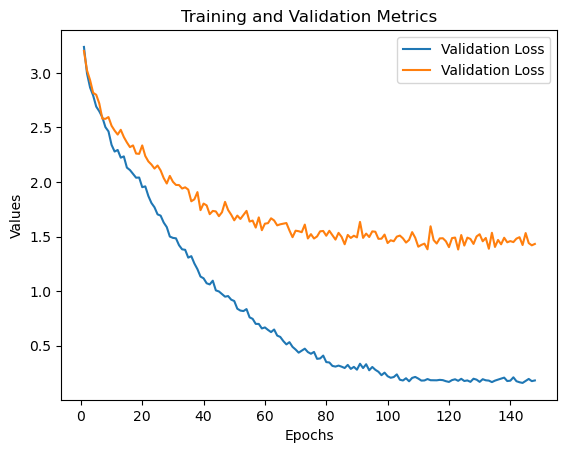

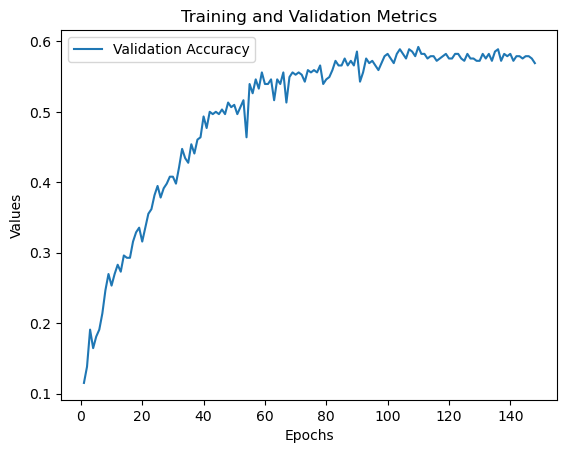

In [2]:
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

# Function to load TensorBoard logs
def load_tensorboard_logs(log_dir):
    event_acc = EventAccumulator(log_dir)
    event_acc.Reload()
    return event_acc

# Function to extract scalar metrics
def extract_scalars(event_acc, metric_name):
    scalar_data = event_acc.Scalars(metric_name)
    steps = [x.step for x in scalar_data]
    values = [x.value for x in scalar_data]
    return steps, values

# Function to plot the metrics
def plot_metrics(log_dirs, metrics_dict):
    for log_dir, metric_name in log_dirs.items():
        event_acc = load_tensorboard_logs(log_dir)
        # print(f"Available tags in {log_dir}:", event_acc.Tags()['scalars'])
        steps, values = extract_scalars(event_acc, metric_name)
        plt.plot(steps, values, label=metrics_dict[metric_name])
    
    plt.xlabel('Epochs')
    plt.ylabel('Values')
    plt.title('Training and Validation Metrics')
    plt.legend()
    plt.show()

log_dirs = {
    'pretrained_models/trained/fsc22_audiofeatures_CNN4/training_losses/Training_vs_Validation_Loss_Training': 'Training_vs_Validation_Loss',
    'pretrained_models/trained/fsc22_audiofeatures_CNN4/training_losses/Training_vs_Validation_Loss_Validation': 'Training_vs_Validation_Loss'
}

metrics_to_plot = {
    'Training_vs_Validation_Loss': 'Training Loss',
    'Training_vs_Validation_Loss': 'Validation Loss'
}

plot_metrics(log_dirs, metrics_to_plot)

log_directory = 'pretrained_models/trained/fsc22_audiofeatures_CNN4/training_losses/Val_Accuracy_Val_Accuracy'
metrics_to_plot = {
    'Val_Accuracy': 'Validation Accuracy'
}

plot_metrics({log_directory: 'Val_Accuracy'}, metrics_to_plot)

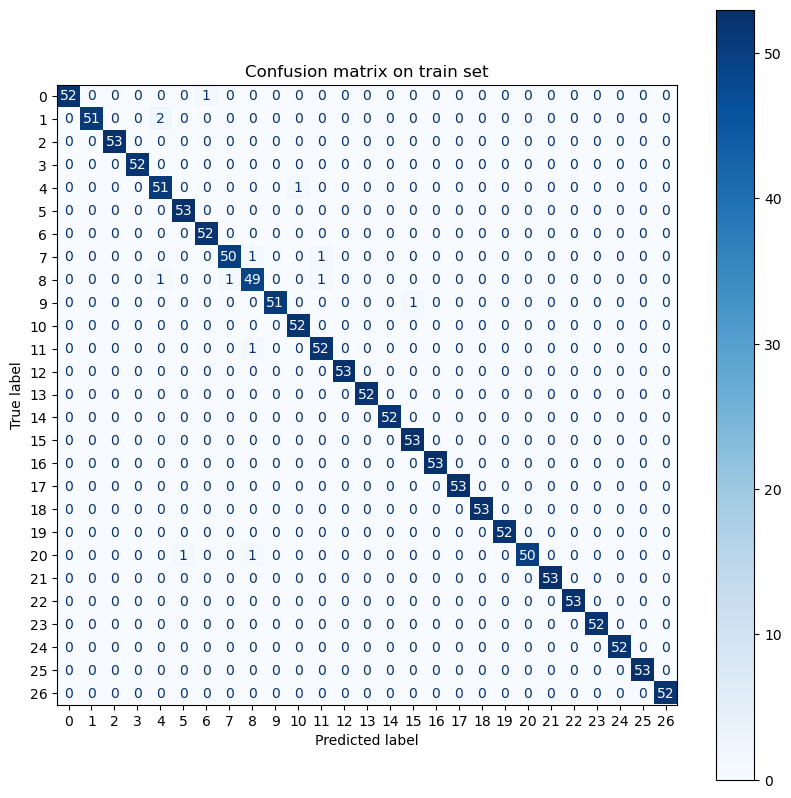


Evaluation on train set:

Loss: 0.10480773976693551
Accuracy: 0.9908257126808167
Precision: 0.9909383654594421
Recall: 0.9907945394515991
F1 Score: 0.9907999038696289


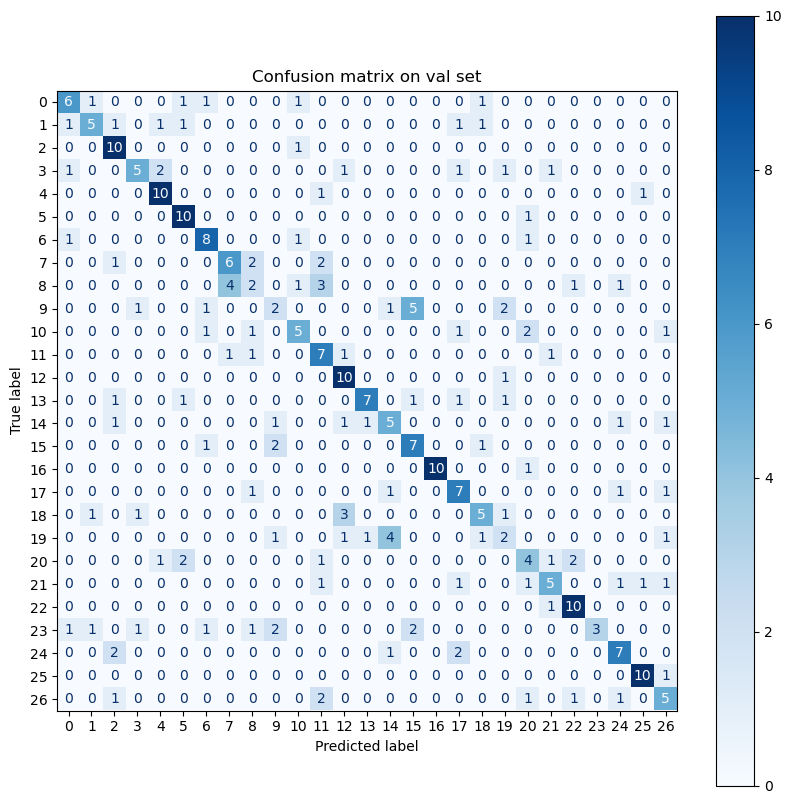


Evaluation on val set:

Loss: 1.4643201033274333
Accuracy: 0.5690789222717285
Precision: 0.5743310451507568
Recall: 0.5723905563354492
F1 Score: 0.5559554696083069


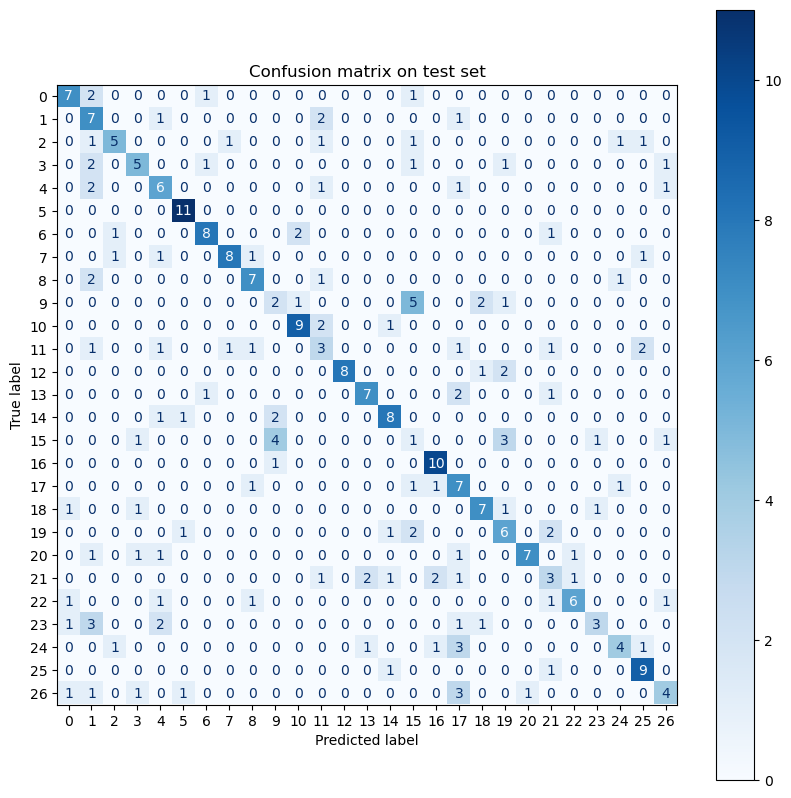


Evaluation on test set:

Loss: 1.4225163857142131
Accuracy: 0.5526315569877625
Precision: 0.5762892961502075
Recall: 0.5516273975372314
F1 Score: 0.5512397289276123


In [3]:
test(cnn, train_data_loader, loss_fn, DEVICE, "train", NUM_CLASSES, None)
test(cnn, val_data_loader, loss_fn, DEVICE, "val", NUM_CLASSES, None)
test(cnn, test_data_loader, loss_fn, DEVICE, "test", NUM_CLASSES, None)

### Baseline Model with Mel-Spectrograms

In [4]:
%reset -f

In [5]:
from baseline.utils.dataset import FSC22Dataset, get_data_loaders
from baseline.utils.test import *
import torch.nn as nn
from baseline.models.cnn4 import CNNNetwork4

ANNOTATIONS_FILE = "fsc22_data/raw/metadata/metadata.csv"
AUDIO_DIR= "fsc22_data/preprocessed/melspectrograms"
BATCH_SIZE = 128
DEVICE = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
NUM_CLASSES = 27
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

fsc22 = FSC22Dataset(annotations_file=ANNOTATIONS_FILE, data_dir=AUDIO_DIR, device=DEVICE)
dim1 = fsc22[0][0].shape[1]
dim2 = fsc22[0][0].shape[2]
cnn = CNNNetwork4(dim1, dim2, NUM_CLASSES)
cnn.load_state_dict(torch.load("pretrained_models/trained/fsc22_melspectrograms_CNN4/best_model/model.pth", map_location=torch.device('cpu')))
cnn = cnn.to(DEVICE)

loss_fn = nn.CrossEntropyLoss()

train_data_loader, val_data_loader, test_data_loader = get_data_loaders(
        dataset=fsc22,
        train_size=TRAIN_SIZE,
        val_size=VAL_SIZE,
        test_size=TEST_SIZE,
        batch_size=BATCH_SIZE
    )

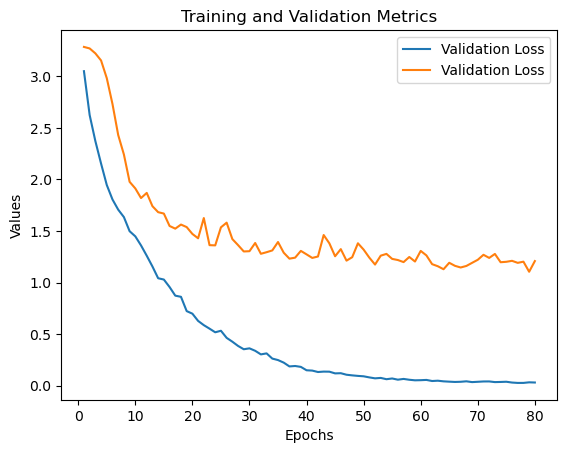

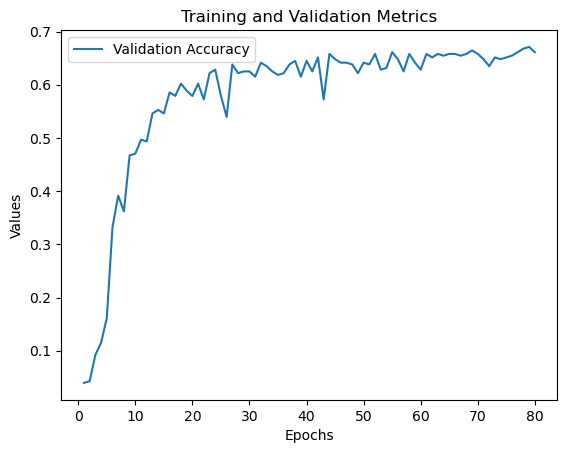

In [6]:
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

# Function to load TensorBoard logs
def load_tensorboard_logs(log_dir):
    event_acc = EventAccumulator(log_dir)
    event_acc.Reload()
    return event_acc

# Function to extract scalar metrics
def extract_scalars(event_acc, metric_name):
    scalar_data = event_acc.Scalars(metric_name)
    steps = [x.step for x in scalar_data]
    values = [x.value for x in scalar_data]
    return steps, values

# Function to plot the metrics
def plot_metrics(log_dirs, metrics_dict):
    for log_dir, metric_name in log_dirs.items():
        event_acc = load_tensorboard_logs(log_dir)
        # print(f"Available tags in {log_dir}:", event_acc.Tags()['scalars'])
        steps, values = extract_scalars(event_acc, metric_name)
        plt.plot(steps, values, label=metrics_dict[metric_name])
    
    plt.xlabel('Epochs')
    plt.ylabel('Values')
    plt.title('Training and Validation Metrics')
    plt.legend()
    plt.show()

log_dirs = {
    'pretrained_models/trained/fsc22_melspectrograms_CNN4/training_losses/Training_vs_Validation_Loss_Training': 'Training_vs_Validation_Loss',
    'pretrained_models/trained/fsc22_melspectrograms_CNN4/training_losses/Training_vs_Validation_Loss_Validation': 'Training_vs_Validation_Loss'
}

metrics_to_plot = {
    'Training_vs_Validation_Loss': 'Training Loss',
    'Training_vs_Validation_Loss': 'Validation Loss'
}

plot_metrics(log_dirs, metrics_to_plot)

log_directory = 'pretrained_models/trained/fsc22_melspectrograms_CNN4/training_losses/Val_Accuracy_Val_Accuracy'
metrics_to_plot = {
    'Val_Accuracy': 'Validation Accuracy'
}

plot_metrics({log_directory: 'Val_Accuracy'}, metrics_to_plot)


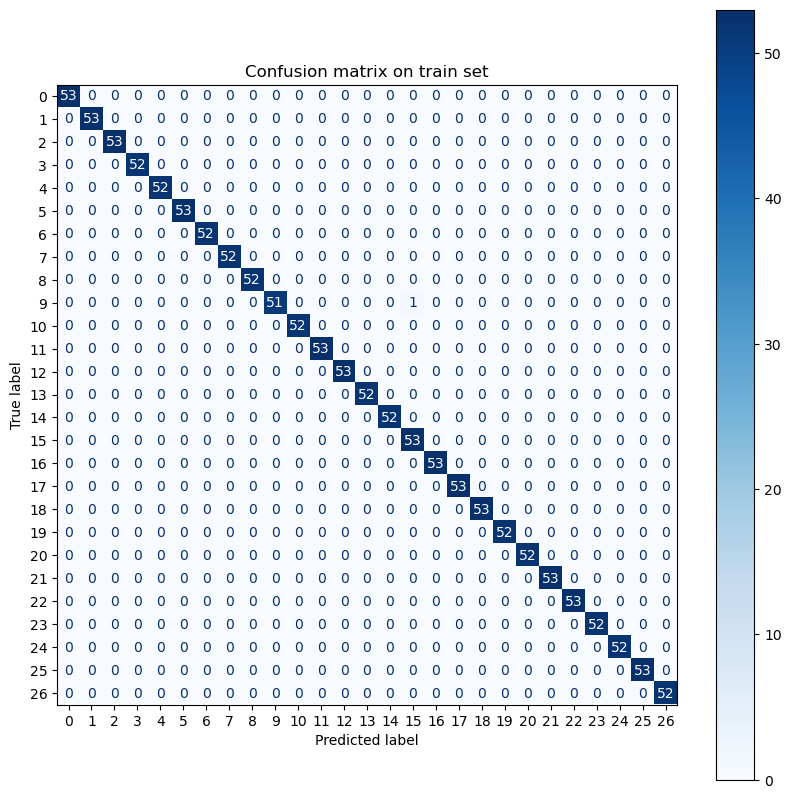


Evaluation on train set:

Loss: 0.010703131323680282
Accuracy: 0.9992942810058594
Precision: 0.9993141293525696
Recall: 0.9992877244949341
F1 Score: 0.9992942810058594


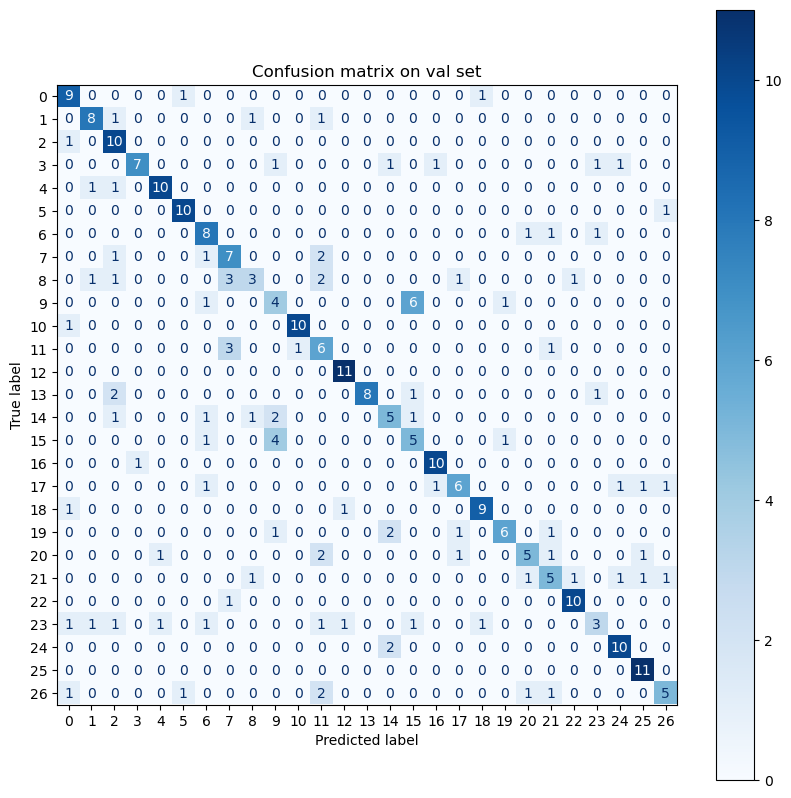


Evaluation on val set:

Loss: 1.1238691210746765
Accuracy: 0.6611841917037964
Precision: 0.6691097021102905
Recall: 0.6641414165496826
F1 Score: 0.6549604535102844


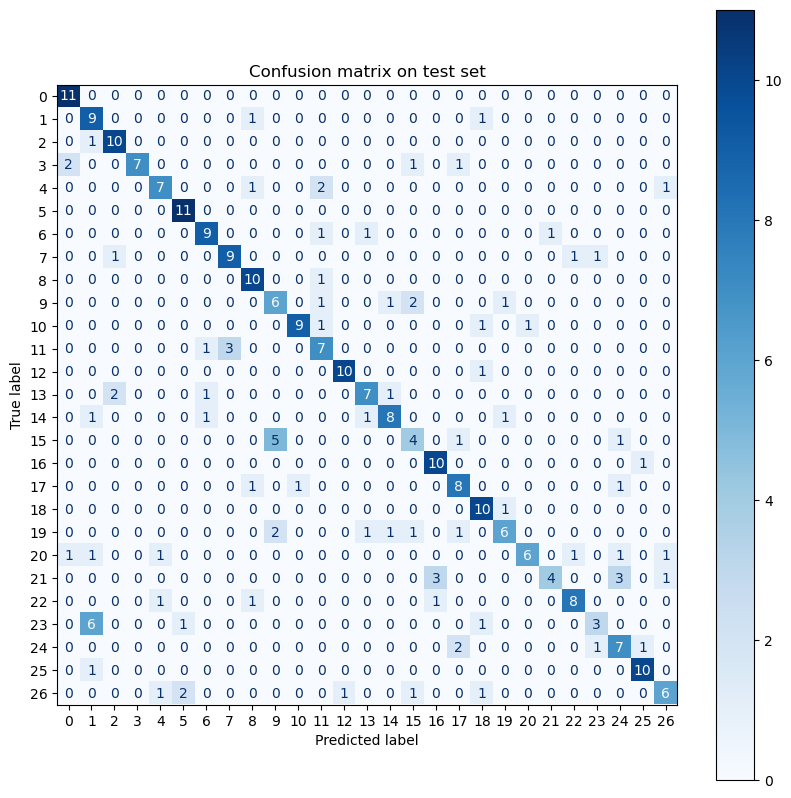


Evaluation on test set:

Loss: 1.1006255149841309
Accuracy: 0.6973684430122375
Precision: 0.7099276185035706
Recall: 0.6989338397979736
F1 Score: 0.6892904043197632


In [7]:
test(cnn, train_data_loader, loss_fn, DEVICE, "train", NUM_CLASSES, None)
test(cnn, val_data_loader, loss_fn, DEVICE, "val", NUM_CLASSES, None)
test(cnn, test_data_loader, loss_fn, DEVICE, "test", NUM_CLASSES, None)

### State-of-the-art Model with BEATs Features

In [8]:
%reset -f

In [9]:
from baseline.utils.dataset import FSC22Dataset, get_data_loaders
from baseline.utils.test import *
import torch.nn as nn
from baseline.models.fcnn1 import FCNNNetwork1

ANNOTATIONS_FILE = "fsc22_data/raw/metadata/metadata.csv"
AUDIO_DIR= "fsc22_data/preprocessed/beatsfeatures"
BATCH_SIZE = 128
DEVICE = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
NUM_CLASSES = 27
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

fsc22 = FSC22Dataset(annotations_file=ANNOTATIONS_FILE, data_dir=AUDIO_DIR, device=DEVICE)
dim1 = fsc22[0][0].shape[1]
dim2 = fsc22[0][0].shape[2]
cnn = FCNNNetwork1(dim1, dim2, NUM_CLASSES)
cnn.load_state_dict(torch.load("pretrained_models/trained/fsc22_beatsfeatures_FCNN1/best_model/model.pth", map_location=torch.device('cpu')))
cnn = cnn.to(DEVICE)

loss_fn = nn.CrossEntropyLoss()

train_data_loader, val_data_loader, test_data_loader = get_data_loaders(
        dataset=fsc22,
        train_size=TRAIN_SIZE,
        val_size=VAL_SIZE,
        test_size=TEST_SIZE,
        batch_size=BATCH_SIZE
    )

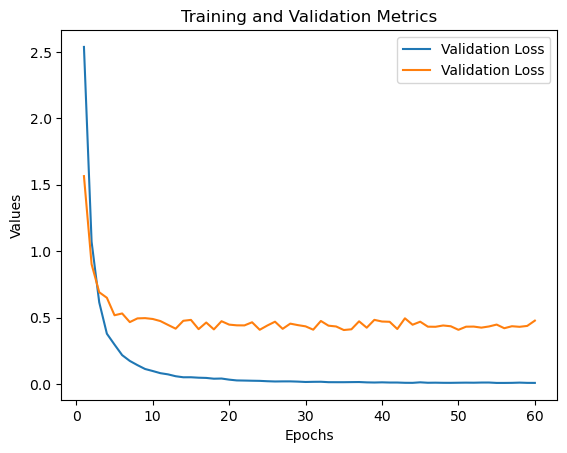

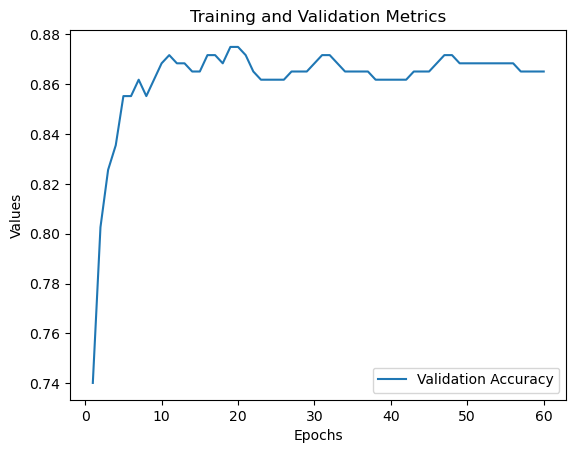

In [10]:
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

# Function to load TensorBoard logs
def load_tensorboard_logs(log_dir):
    event_acc = EventAccumulator(log_dir)
    event_acc.Reload()
    return event_acc

# Function to extract scalar metrics
def extract_scalars(event_acc, metric_name):
    scalar_data = event_acc.Scalars(metric_name)
    steps = [x.step for x in scalar_data]
    values = [x.value for x in scalar_data]
    return steps, values

# Function to plot the metrics
def plot_metrics(log_dirs, metrics_dict):
    for log_dir, metric_name in log_dirs.items():
        event_acc = load_tensorboard_logs(log_dir)
        # print(f"Available tags in {log_dir}:", event_acc.Tags()['scalars'])
        steps, values = extract_scalars(event_acc, metric_name)
        plt.plot(steps, values, label=metrics_dict[metric_name])
    
    plt.xlabel('Epochs')
    plt.ylabel('Values')
    plt.title('Training and Validation Metrics')
    plt.legend()
    plt.show()

log_dirs = {
    'pretrained_models/trained/fsc22_beatsfeatures_FCNN1/training_losses/Training_vs_Validation_Loss_Training': 'Training_vs_Validation_Loss',
    'pretrained_models/trained/fsc22_beatsfeatures_FCNN1/training_losses/Training_vs_Validation_Loss_Validation': 'Training_vs_Validation_Loss'
}

metrics_to_plot = {
    'Training_vs_Validation_Loss': 'Training Loss',
    'Training_vs_Validation_Loss': 'Validation Loss'
}

plot_metrics(log_dirs, metrics_to_plot)

log_directory = 'pretrained_models/trained/fsc22_beatsfeatures_FCNN1/training_losses/Val_Accuracy_Val_Accuracy'
metrics_to_plot = {
    'Val_Accuracy': 'Validation Accuracy'
}

plot_metrics({log_directory: 'Val_Accuracy'}, metrics_to_plot)

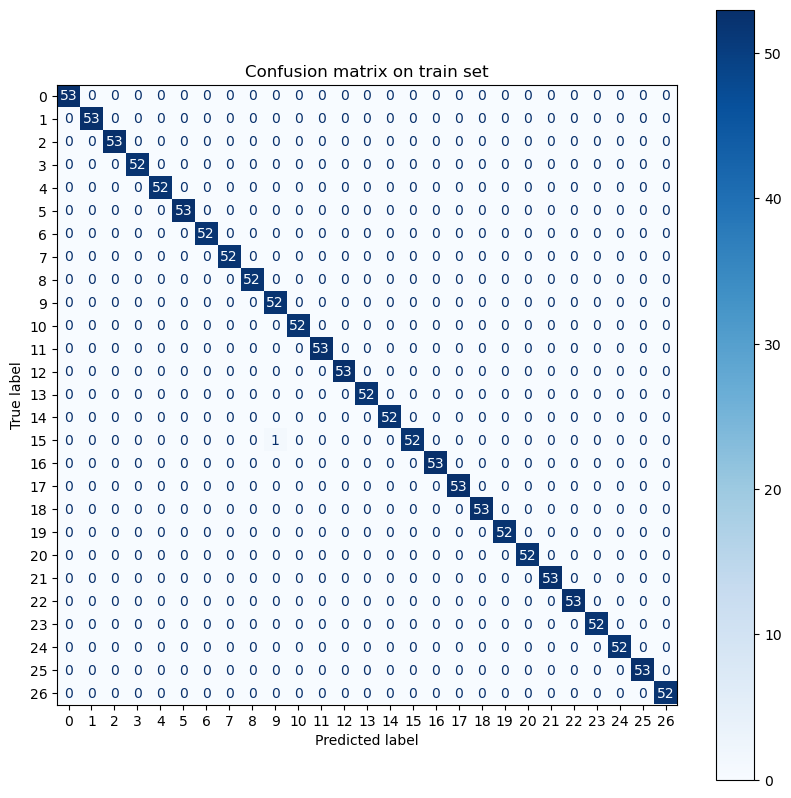


Evaluation on train set:

Loss: 0.0041116934541302426
Accuracy: 0.9992942810058594
Precision: 0.9993011951446533
Recall: 0.9993011951446533
F1 Score: 0.9992945194244385


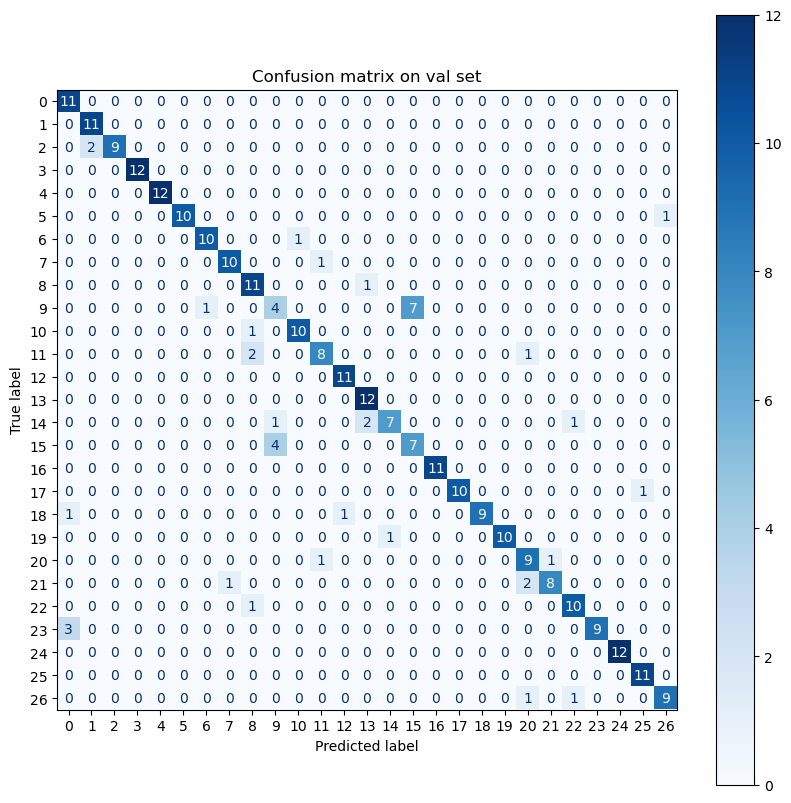


Evaluation on val set:

Loss: 0.44499388337135315
Accuracy: 0.8651315569877625
Precision: 0.8743481636047363
Recall: 0.8653198480606079
F1 Score: 0.8643530607223511


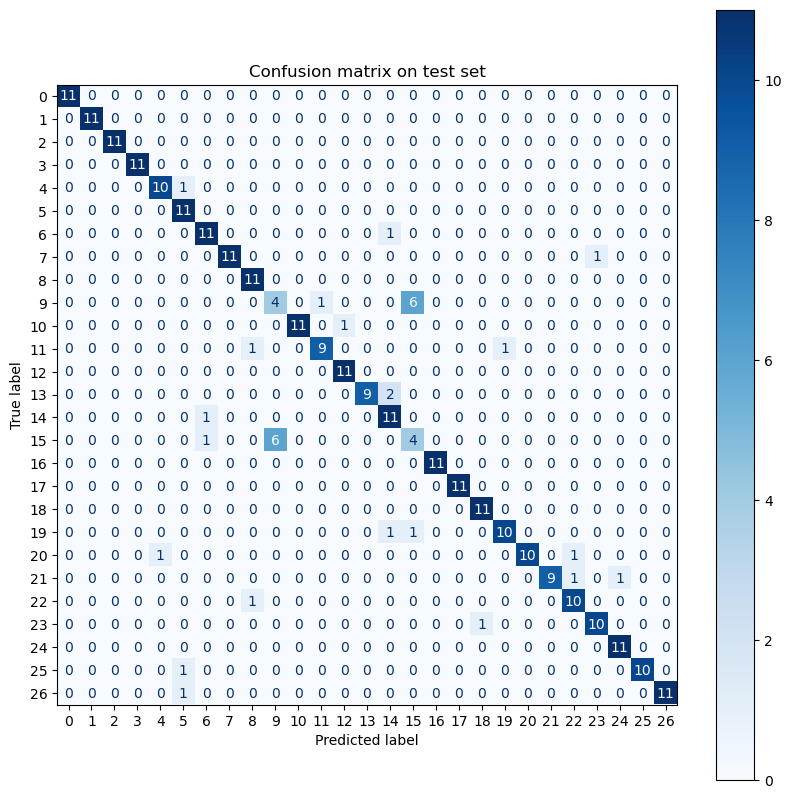


Evaluation on test set:

Loss: 0.33368681371212006
Accuracy: 0.8914473652839661
Precision: 0.8957629203796387
Recall: 0.8914141654968262
F1 Score: 0.8907824754714966


In [11]:
test(cnn, train_data_loader, loss_fn, DEVICE, "train", NUM_CLASSES, None)
test(cnn, val_data_loader, loss_fn, DEVICE, "val", NUM_CLASSES, None)
test(cnn, test_data_loader, loss_fn, DEVICE, "test", NUM_CLASSES, None)

### Baseline Model on Augmented Data with Mel-Spectrograms

In [12]:
%reset -f

In [13]:
from augmented.utils.dataset import FSC22Dataset, get_data_loaders
from augmented.utils.test import *
import torch.nn as nn
from augmented.models.cnn4 import CNNNetwork4

ANNOTATIONS_FILE = "fsc22_data/augmented_B_50/metadata/metadata.csv"
AUDIO_DIR= "fsc22_data/preprocessed/augmented_B_50_melspectrograms"
BATCH_SIZE = 128
DEVICE = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
NUM_CLASSES = 27
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

fsc22 = FSC22Dataset(annotations_file=ANNOTATIONS_FILE, data_dir=AUDIO_DIR, device=DEVICE)
dim1 = fsc22[0][0].shape[1]
dim2 = fsc22[0][0].shape[2]
cnn = CNNNetwork4(dim1, dim2, NUM_CLASSES)
cnn.load_state_dict(torch.load("pretrained_models/trained/fsc22_augmented_B_50_melspectrograms_CNN4/best_model/model.pth", map_location=torch.device('cpu')))
cnn = cnn.to(DEVICE)

loss_fn = nn.CrossEntropyLoss()

train_data_loader, val_data_loader, test_data_loader = get_data_loaders(
        dataset=fsc22,
        batch_size=BATCH_SIZE
    )

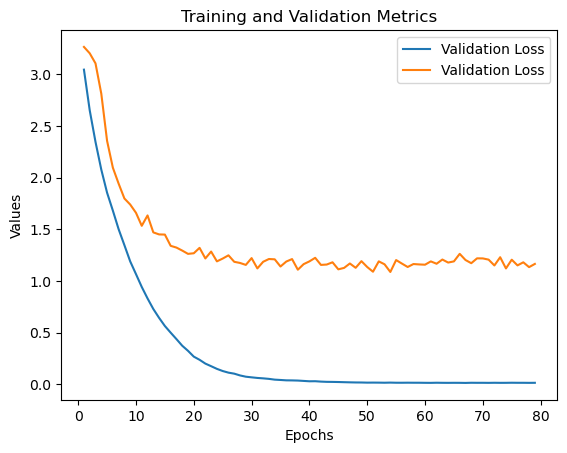

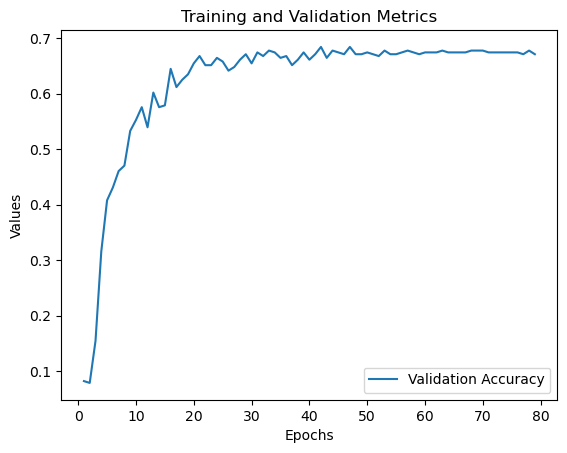

In [14]:
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

# Function to load TensorBoard logs
def load_tensorboard_logs(log_dir):
    event_acc = EventAccumulator(log_dir)
    event_acc.Reload()
    return event_acc

# Function to extract scalar metrics
def extract_scalars(event_acc, metric_name):
    scalar_data = event_acc.Scalars(metric_name)
    steps = [x.step for x in scalar_data]
    values = [x.value for x in scalar_data]
    return steps, values

# Function to plot the metrics
def plot_metrics(log_dirs, metrics_dict):
    for log_dir, metric_name in log_dirs.items():
        event_acc = load_tensorboard_logs(log_dir)
        # print(f"Available tags in {log_dir}:", event_acc.Tags()['scalars'])
        steps, values = extract_scalars(event_acc, metric_name)
        plt.plot(steps, values, label=metrics_dict[metric_name])
    
    plt.xlabel('Epochs')
    plt.ylabel('Values')
    plt.title('Training and Validation Metrics')
    plt.legend()
    plt.show()

log_dirs = {
    'pretrained_models/trained/fsc22_augmented_B_50_melspectrograms_CNN4/training_losses/Training_vs_Validation_Loss_Training': 'Training_vs_Validation_Loss',
    'pretrained_models/trained/fsc22_augmented_B_50_melspectrograms_CNN4/training_losses/Training_vs_Validation_Loss_Validation': 'Training_vs_Validation_Loss'
}

metrics_to_plot = {
    'Training_vs_Validation_Loss': 'Training Loss',
    'Training_vs_Validation_Loss': 'Validation Loss'
}

plot_metrics(log_dirs, metrics_to_plot)

log_directory = 'pretrained_models/trained/fsc22_augmented_B_50_melspectrograms_CNN4/training_losses/Val_Accuracy_Val_Accuracy'
metrics_to_plot = {
    'Val_Accuracy': 'Validation Accuracy'
}

plot_metrics({log_directory: 'Val_Accuracy'}, metrics_to_plot)

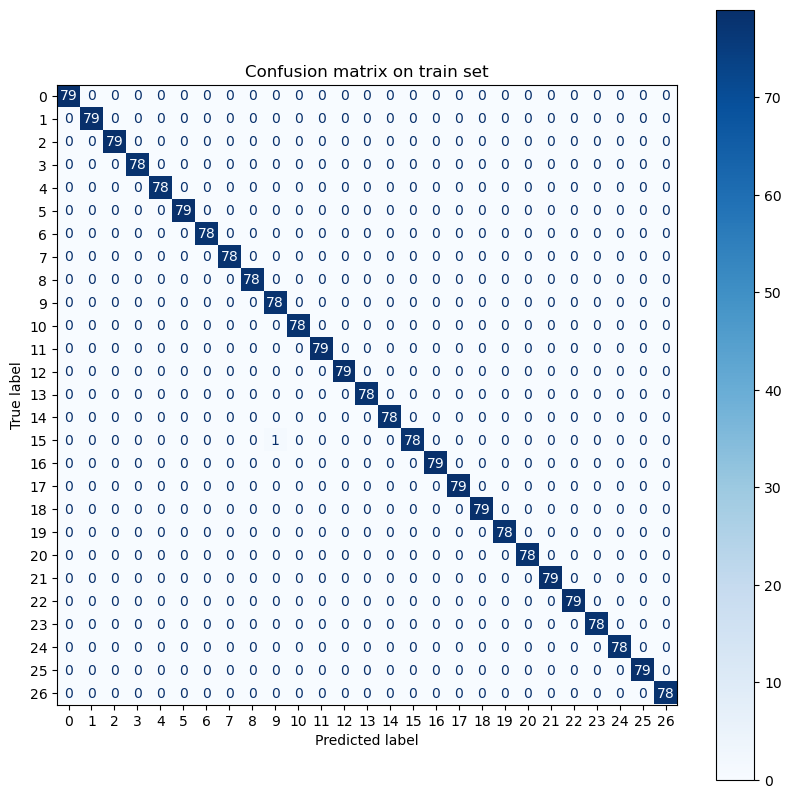


Evaluation on train set:

Loss: 0.006429022561539622
Accuracy: 0.9995280504226685
Precision: 0.9995311498641968
Recall: 0.9995311498641968
F1 Score: 0.999528169631958


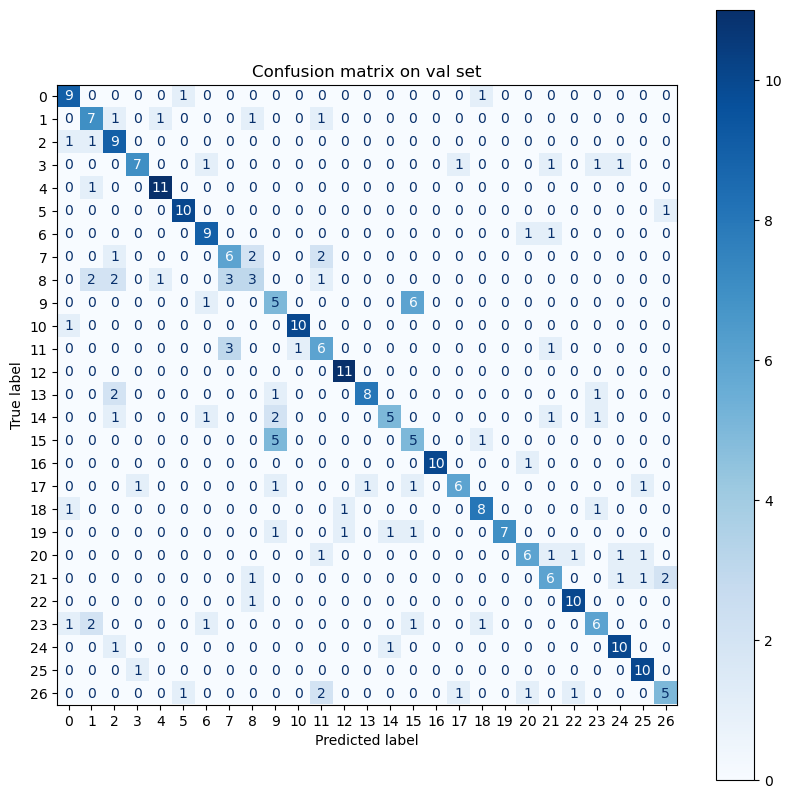


Evaluation on val set:

Loss: 1.3011201818784077
Accuracy: 0.6743420958518982
Precision: 0.6881991624832153
Recall: 0.6762064695358276
F1 Score: 0.6735882759094238


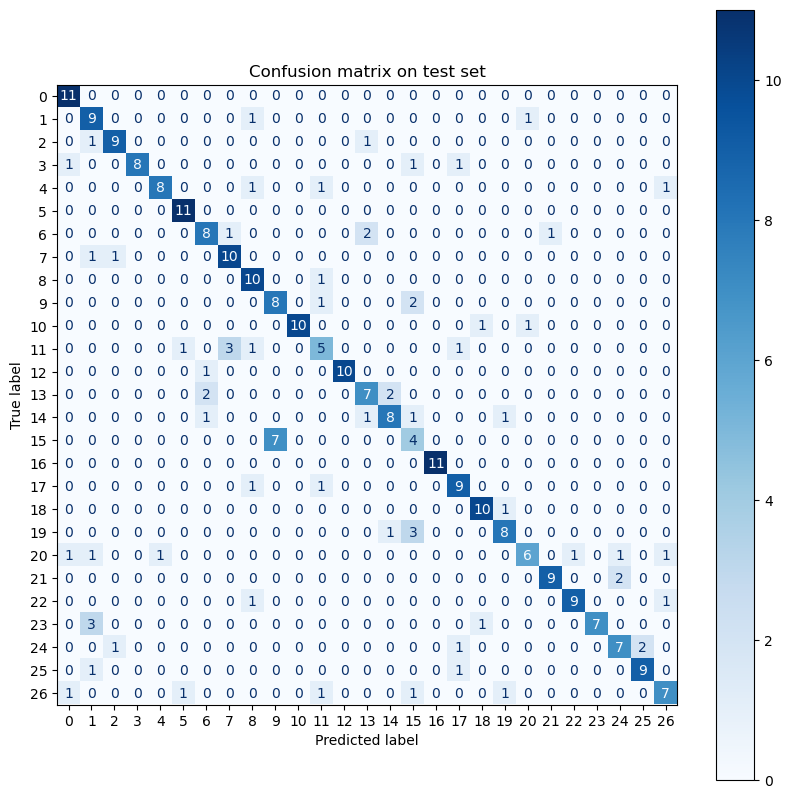


Evaluation on test set:

Loss: 1.0516150991121929
Accuracy: 0.75
Precision: 0.7666835784912109
Recall: 0.7516834735870361
F1 Score: 0.7514863014221191


In [15]:
test(cnn, train_data_loader, loss_fn, DEVICE, "train", NUM_CLASSES, None)
test(cnn, val_data_loader, loss_fn, DEVICE, "val", NUM_CLASSES, None)
test(cnn, test_data_loader, loss_fn, DEVICE, "test", NUM_CLASSES, None)

### Baseline Model on FSD50K (Transfer Learning)

In [16]:
%reset -f

In [17]:
from transfer_learning_v1.utils.dataset import FSD50KDataset, get_data_loaders
from transfer_learning_v1.utils.test import *
import torch.nn as nn
from transfer_learning_v1.models.cnn4 import CNNNetwork4

ANNOTATIONS_FILE = "fsd50k_data/raw/metadata/metadata.csv"
AUDIO_DIR= "fsd50k_data/preprocessed/melspectrograms"
VOCABULARY_FILE = "fsd50k_data/raw/metadata/vocabulary.csv"
BATCH_SIZE = 128
DEVICE = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
NUM_CLASSES = 200
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

fsd50k = FSD50KDataset(annotations_file=ANNOTATIONS_FILE, vocabulary_file=VOCABULARY_FILE, data_dir=AUDIO_DIR, device=DEVICE, model_str="CNN4")
dim1 = fsd50k[0][0].shape[1]
dim2 = fsd50k[0][0].shape[2]
cnn = CNNNetwork4(dim1, dim2, NUM_CLASSES)
cnn.load_state_dict(torch.load("pretrained_models/trained/fsd50k_melspectrograms_transfer_v1_CNN4/best_model/model.pth", map_location=torch.device('cpu')))
cnn = cnn.to(DEVICE)

loss_fn = nn.BCEWithLogitsLoss()

train_data_loader, val_data_loader, test_data_loader = get_data_loaders(
        dataset=fsd50k,
        batch_size=BATCH_SIZE
    )

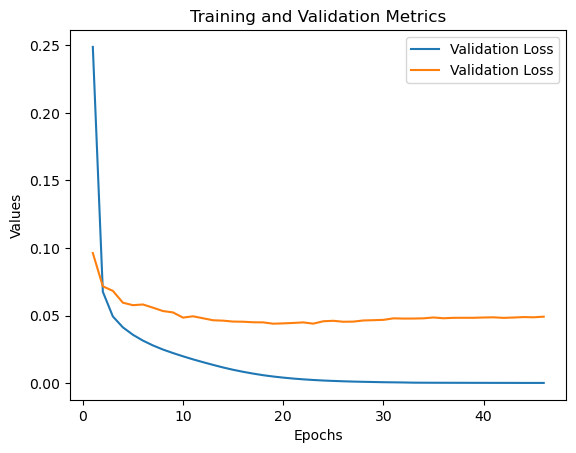

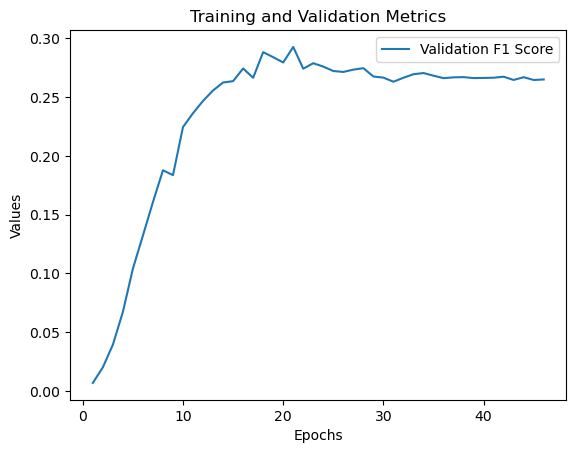

In [18]:
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

# Function to load TensorBoard logs
def load_tensorboard_logs(log_dir):
    event_acc = EventAccumulator(log_dir)
    event_acc.Reload()
    return event_acc

# Function to extract scalar metrics
def extract_scalars(event_acc, metric_name):
    scalar_data = event_acc.Scalars(metric_name)
    steps = [x.step for x in scalar_data]
    values = [x.value for x in scalar_data]
    return steps, values

# Function to plot the metrics
def plot_metrics(log_dirs, metrics_dict):
    for log_dir, metric_name in log_dirs.items():
        event_acc = load_tensorboard_logs(log_dir)
        # print(f"Available tags in {log_dir}:", event_acc.Tags()['scalars'])
        steps, values = extract_scalars(event_acc, metric_name)
        plt.plot(steps, values, label=metrics_dict[metric_name])
    
    plt.xlabel('Epochs')
    plt.ylabel('Values')
    plt.title('Training and Validation Metrics')
    plt.legend()
    plt.show()

log_dirs = {
    'pretrained_models/trained/fsd50k_melspectrograms_transfer_v1_CNN4/training_losses/Training_vs_Validation_Loss_Training': 'Training_vs_Validation_Loss',
    'pretrained_models/trained/fsd50k_melspectrograms_transfer_v1_CNN4/training_losses/Training_vs_Validation_Loss_Validation': 'Training_vs_Validation_Loss'
}

metrics_to_plot = {
    'Training_vs_Validation_Loss': 'Training Loss',
    'Training_vs_Validation_Loss': 'Validation Loss'
}

plot_metrics(log_dirs, metrics_to_plot)

log_directory = 'pretrained_models/trained/fsd50k_melspectrograms_transfer_v1_CNN4/training_losses/Val_f1_score_Val_f1_score'
metrics_to_plot = {
    'Val_f1_score': 'Validation F1 Score'
}

plot_metrics({log_directory: 'Val_f1_score'}, metrics_to_plot)

In [19]:
test(cnn, train_data_loader, loss_fn, DEVICE, "train", NUM_CLASSES, None)
test(cnn, val_data_loader, loss_fn, DEVICE, "val", NUM_CLASSES, None)
test(cnn, test_data_loader, loss_fn, DEVICE, "test", NUM_CLASSES, None)


Evaluation on train set:

Loss: 0.0007771212379642142
Accuracy: 0.99998939037323
Precision: 0.9985373020172119
Recall: 0.9999064207077026
F1 Score: 0.9992097616195679

Evaluation on val set:

Loss: 0.049197098861138024
Accuracy: 0.9879736304283142
Precision: 0.5351195335388184
Recall: 0.19909590482711792
F1 Score: 0.2652372121810913

Evaluation on test set:

Loss: 0.06927074510604143
Accuracy: 0.9844213724136353
Precision: 0.6315528154373169
Recall: 0.16534700989723206
F1 Score: 0.23301765322685242


### Baseline Model on FSC22 (After Transfer Learning)

In [20]:
%reset -f

In [21]:
from transfer_learning_v2.utils.dataset import FSC22Dataset, get_data_loaders
from transfer_learning_v2.utils.test import *
import torch.nn as nn
from transfer_learning_v2.models.cnn4 import CNNNetwork4

ANNOTATIONS_FILE = "fsc22_data/raw/metadata/metadata.csv"
AUDIO_DIR= "fsc22_data/preprocessed/melspectrograms"
BATCH_SIZE = 128
DEVICE = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
NUM_CLASSES = 27
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

fsc22 = FSC22Dataset(annotations_file=ANNOTATIONS_FILE, data_dir=AUDIO_DIR, device=DEVICE, model_str="CNN4")
dim1 = fsc22[0][0].shape[1]
dim2 = fsc22[0][0].shape[2]
cnn = CNNNetwork4(dim1, dim2, NUM_CLASSES)
cnn.load_state_dict(torch.load("pretrained_models/trained/fsc22_melspectrograms_transfer_v2_CNN4/best_model/model.pth", map_location=torch.device('cpu')))
cnn = cnn.to(DEVICE)

loss_fn = nn.CrossEntropyLoss()

train_data_loader, val_data_loader, test_data_loader = get_data_loaders(
        dataset=fsc22,
        train_size=TRAIN_SIZE,
        val_size=VAL_SIZE,
        test_size=TEST_SIZE,
        batch_size=BATCH_SIZE
    )

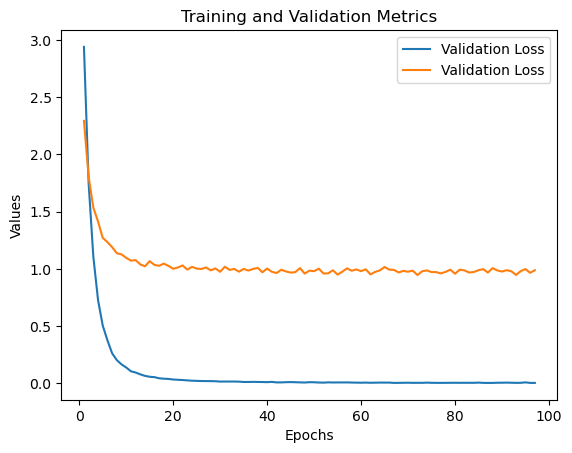

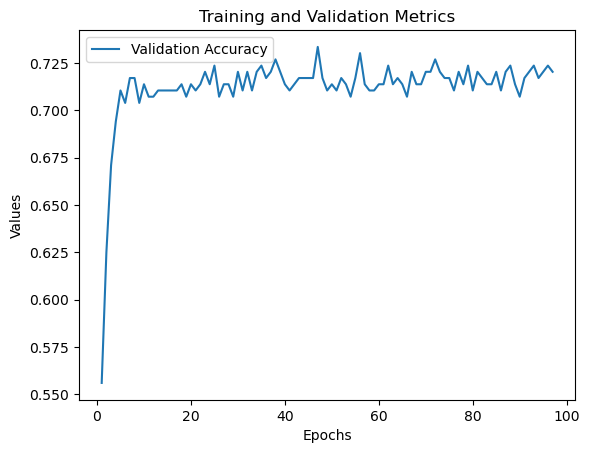

In [22]:
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

# Function to load TensorBoard logs
def load_tensorboard_logs(log_dir):
    event_acc = EventAccumulator(log_dir)
    event_acc.Reload()
    return event_acc

# Function to extract scalar metrics
def extract_scalars(event_acc, metric_name):
    scalar_data = event_acc.Scalars(metric_name)
    steps = [x.step for x in scalar_data]
    values = [x.value for x in scalar_data]
    return steps, values

# Function to plot the metrics
def plot_metrics(log_dirs, metrics_dict):
    for log_dir, metric_name in log_dirs.items():
        event_acc = load_tensorboard_logs(log_dir)
        # print(f"Available tags in {log_dir}:", event_acc.Tags()['scalars'])
        steps, values = extract_scalars(event_acc, metric_name)
        plt.plot(steps, values, label=metrics_dict[metric_name])
    
    plt.xlabel('Epochs')
    plt.ylabel('Values')
    plt.title('Training and Validation Metrics')
    plt.legend()
    plt.show()

log_dirs = {
    'pretrained_models/trained/fsc22_melspectrograms_transfer_v2_CNN4/training_losses/Training_vs_Validation_Loss_Training': 'Training_vs_Validation_Loss',
    'pretrained_models/trained/fsc22_melspectrograms_transfer_v2_CNN4/training_losses/Training_vs_Validation_Loss_Validation': 'Training_vs_Validation_Loss'
}

metrics_to_plot = {
    'Training_vs_Validation_Loss': 'Training Loss',
    'Training_vs_Validation_Loss': 'Validation Loss'
}

plot_metrics(log_dirs, metrics_to_plot)

log_directory = 'pretrained_models/trained/fsc22_melspectrograms_transfer_v2_CNN4/training_losses/Val_Accuracy_Val_Accuracy'
metrics_to_plot = {
    'Val_Accuracy': 'Validation Accuracy'
}

plot_metrics({log_directory: 'Val_Accuracy'}, metrics_to_plot)

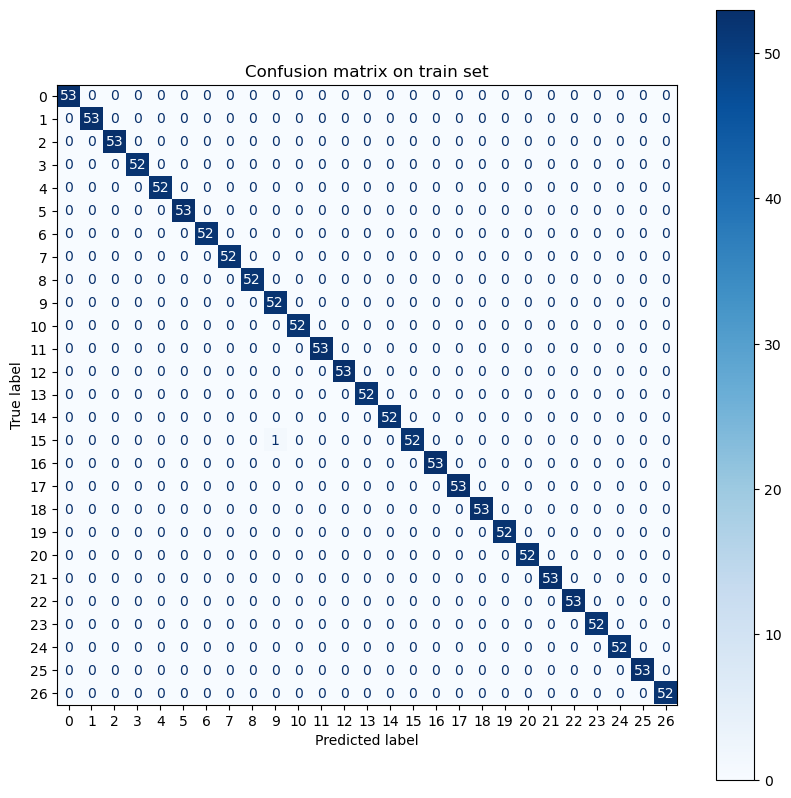


Evaluation on train set:

Loss: 0.001506070436638159
Accuracy: 0.9992942810058594
Precision: 0.9993011951446533
Recall: 0.9993011951446533
F1 Score: 0.9992945194244385


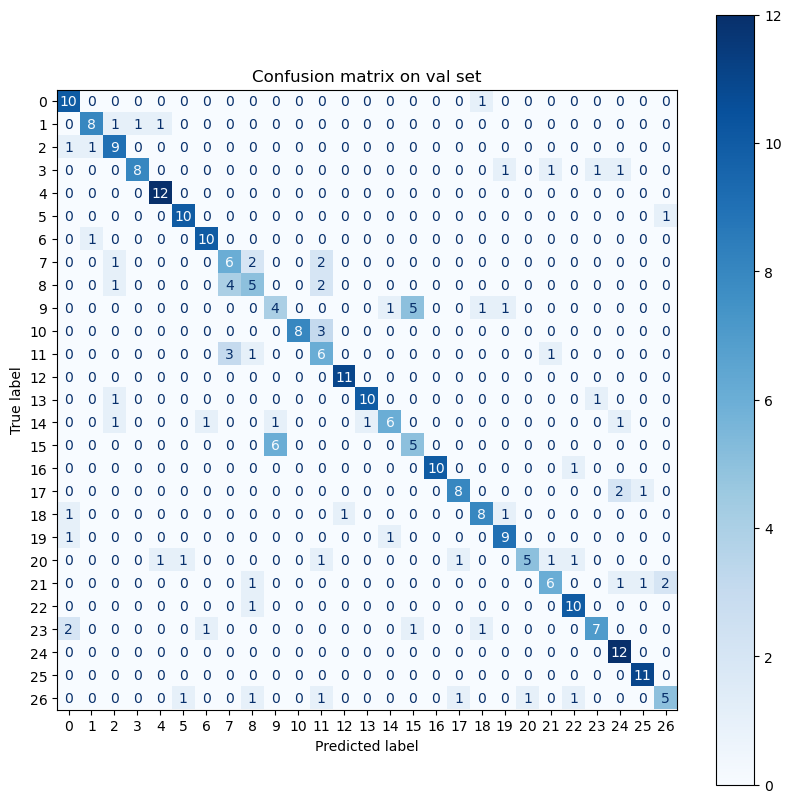


Evaluation on val set:

Loss: 0.9677605231602987
Accuracy: 0.7203947305679321
Precision: 0.7308727502822876
Recall: 0.721099853515625
F1 Score: 0.716914176940918


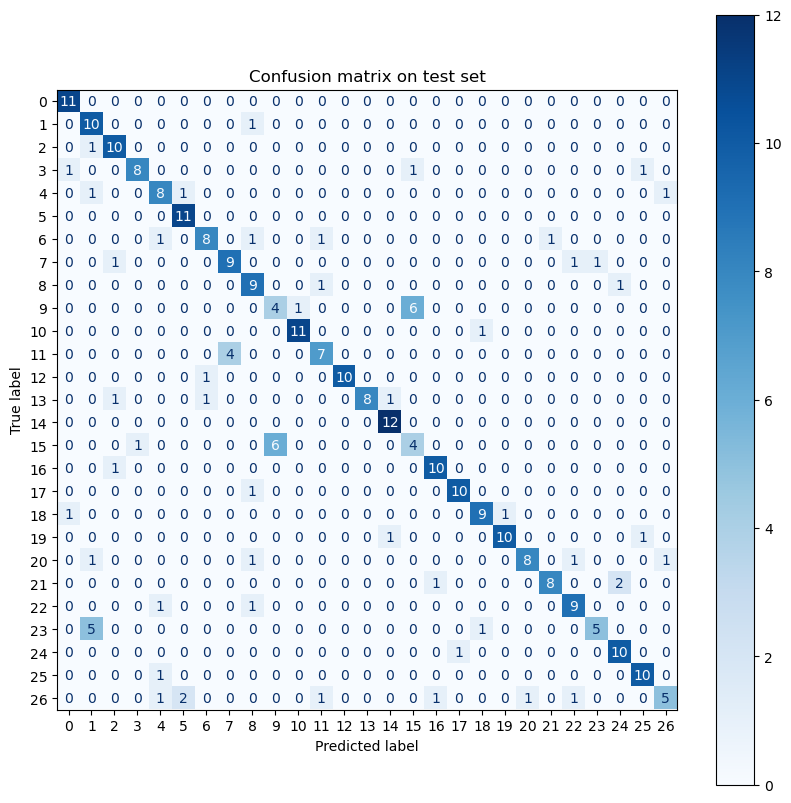


Evaluation on test set:

Loss: 0.8711385329564413
Accuracy: 0.7697368264198303
Precision: 0.7789807319641113
Recall: 0.7702019810676575
F1 Score: 0.7650530338287354


In [23]:
test(cnn, train_data_loader, loss_fn, DEVICE, "train", NUM_CLASSES, None)
test(cnn, val_data_loader, loss_fn, DEVICE, "val", NUM_CLASSES, None)
test(cnn, test_data_loader, loss_fn, DEVICE, "test", NUM_CLASSES, None)

### VGG16 on FSC22 (Transfer Learning)

In [24]:
%reset -f

In [25]:
from transfer_learning_v2.utils.dataset import FSC22Dataset, get_data_loaders
from transfer_learning_v2.utils.test import *
import torch.nn as nn
import torchvision.models as models

ANNOTATIONS_FILE = "fsc22_data/raw/metadata/metadata.csv"
AUDIO_DIR= "fsc22_data/preprocessed/melspectrograms"
BATCH_SIZE = 128
DEVICE = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
NUM_CLASSES = 27
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

fsc22 = FSC22Dataset(annotations_file=ANNOTATIONS_FILE, data_dir=AUDIO_DIR, device=DEVICE, model_str="VGG16")
dim1 = fsc22[0][0].shape[1]
dim2 = fsc22[0][0].shape[2]

vgg16 = models.vgg16(weights=models.VGG16_Weights.DEFAULT)
original_weights = vgg16.features[0].weight.data
new_conv1 = nn.Conv2d(1, vgg16.features[0].out_channels, kernel_size=3, stride=1, padding=1)
new_conv1.weight.data = original_weights.mean(dim=1, keepdim=True)
vgg16.features[0] = new_conv1
vgg16.classifier[6] = nn.Linear(vgg16.classifier[6].in_features, NUM_CLASSES)
        
vgg16.load_state_dict(torch.load("pretrained_models/trained/fsc22_melspectrograms_transfer_v2_VGG16_4/best_model/model.pth", map_location=torch.device('cpu')))
vgg16 = vgg16.to(DEVICE)

loss_fn = nn.CrossEntropyLoss()

train_data_loader, val_data_loader, test_data_loader = get_data_loaders(
        dataset=fsc22,
        train_size=TRAIN_SIZE,
        val_size=VAL_SIZE,
        test_size=TEST_SIZE,
        batch_size=BATCH_SIZE
    )

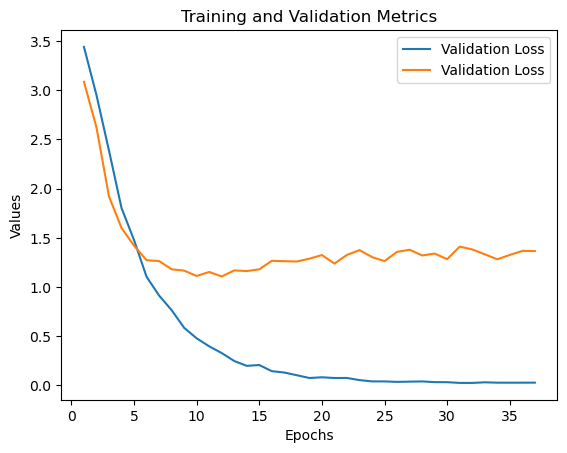

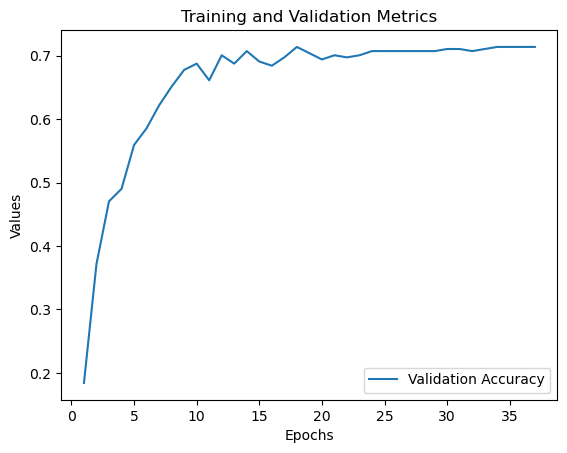

In [26]:
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

# Function to load TensorBoard logs
def load_tensorboard_logs(log_dir):
    event_acc = EventAccumulator(log_dir)
    event_acc.Reload()
    return event_acc

# Function to extract scalar metrics
def extract_scalars(event_acc, metric_name):
    scalar_data = event_acc.Scalars(metric_name)
    steps = [x.step for x in scalar_data]
    values = [x.value for x in scalar_data]
    return steps, values

# Function to plot the metrics
def plot_metrics(log_dirs, metrics_dict):
    for log_dir, metric_name in log_dirs.items():
        event_acc = load_tensorboard_logs(log_dir)
        # print(f"Available tags in {log_dir}:", event_acc.Tags()['scalars'])
        steps, values = extract_scalars(event_acc, metric_name)
        plt.plot(steps, values, label=metrics_dict[metric_name])
    
    plt.xlabel('Epochs')
    plt.ylabel('Values')
    plt.title('Training and Validation Metrics')
    plt.legend()
    plt.show()

log_dirs = {
    'pretrained_models/trained/fsc22_melspectrograms_transfer_v2_VGG16_4/training_losses/Training_vs_Validation_Loss_Training': 'Training_vs_Validation_Loss',
    'pretrained_models/trained/fsc22_melspectrograms_transfer_v2_VGG16_4/training_losses/Training_vs_Validation_Loss_Validation': 'Training_vs_Validation_Loss'
}

metrics_to_plot = {
    'Training_vs_Validation_Loss': 'Training Loss',
    'Training_vs_Validation_Loss': 'Validation Loss'
}

plot_metrics(log_dirs, metrics_to_plot)

log_directory = 'pretrained_models/trained/fsc22_melspectrograms_transfer_v2_VGG16_4/training_losses/Val_Accuracy_Val_Accuracy'
metrics_to_plot = {
    'Val_Accuracy': 'Validation Accuracy'
}

plot_metrics({log_directory: 'Val_Accuracy'}, metrics_to_plot)

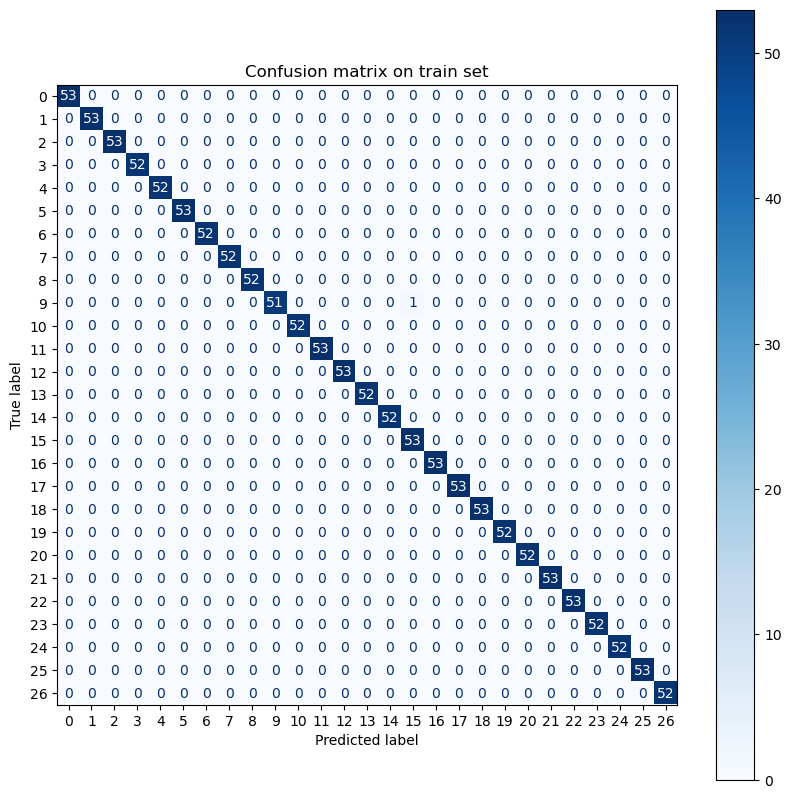


Evaluation on train set:

Loss: 0.0029205370374256745
Accuracy: 0.9992942810058594
Precision: 0.9993141293525696
Recall: 0.9992877244949341
F1 Score: 0.9992942810058594


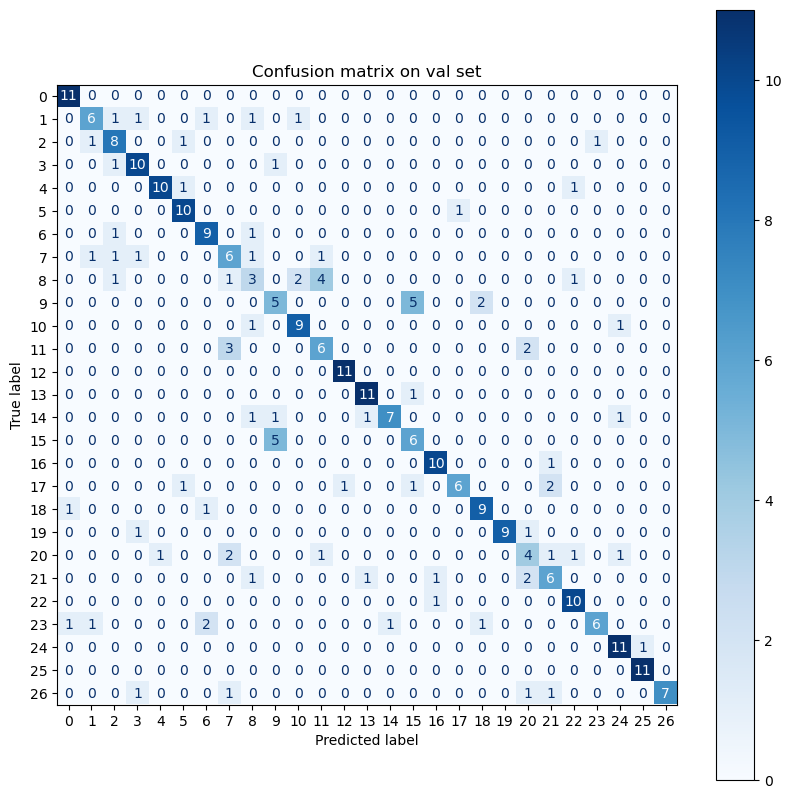


Evaluation on val set:

Loss: 1.2416133085886638
Accuracy: 0.7138158082962036
Precision: 0.7218038439750671
Recall: 0.7149270176887512
F1 Score: 0.710228443145752


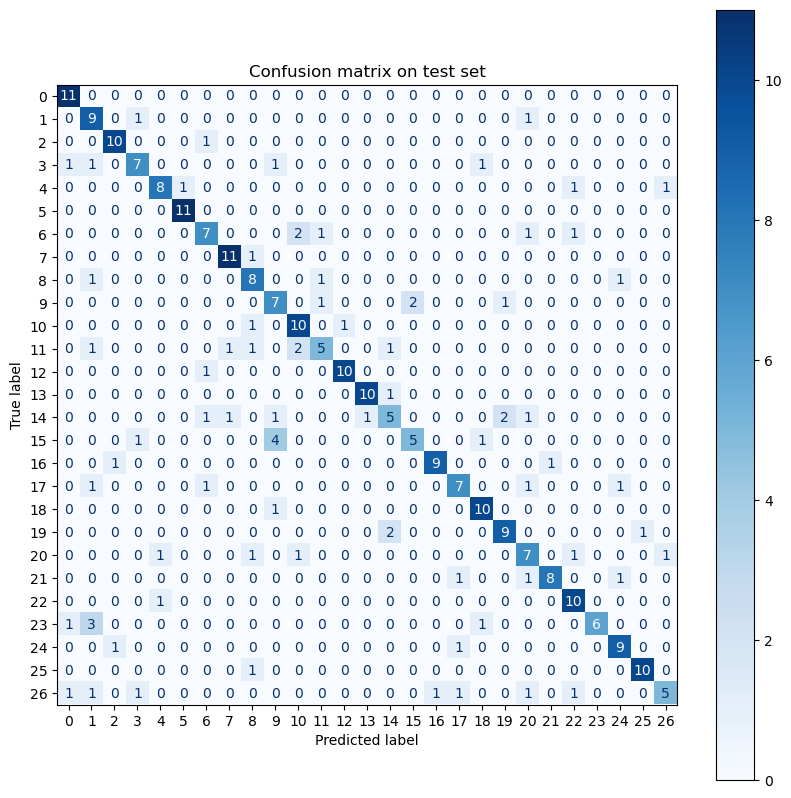


Evaluation on test set:

Loss: 1.1844617923100789
Accuracy: 0.7368420958518982
Precision: 0.7472949028015137
Recall: 0.7390572428703308
F1 Score: 0.7333667278289795


In [27]:
test(vgg16, train_data_loader, loss_fn, DEVICE, "train", NUM_CLASSES, None)
test(vgg16, val_data_loader, loss_fn, DEVICE, "val", NUM_CLASSES, None)
test(vgg16, test_data_loader, loss_fn, DEVICE, "test", NUM_CLASSES, None)